# Run Scripts

步骤
1. 利用janus.py产生理论数据，实验前明确需要粒子结构、接触角、距离
2. 利用forceAnalysisTool.py产生模拟实验的力学数据
3. 利用forceCompareTool.py对比模拟实验和理论的差异
4. 利用profileAnalysisTool.py产生模拟实验液面形态数据，需要输入距离。

In [22]:
%run janus.py -ofile theory_EPS04_D29.h5 -phobic 112.06 -philic 51.83 -height 50.9 -L 49.3 -R 10.5 -D 63.0

SystemExit: Can't form a menisci

In [ ]:
%run profileAnalysisTool.py -idump ./pos14/dump_janus_measure.1 -ofile simu_D29.h5

In [16]:
%run profileCompareTool.py -sln simu_D29.h5 -thy theory_EPS04_D29.h5 -ofile profile_D29.pdf -ylimn 2


Input Simulational HDF5 datasets : simu_D29.h5
Input Theoretical HDF5 datasets : theory_EPS04_D29.h5
Output density profile comparison figure : profile_D29.pdf


Input theoretical dataset : theory_data.h5
Input simulational dataset : simulation_force.h5


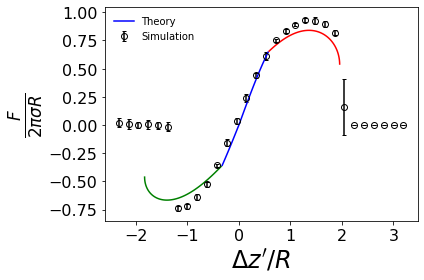

In [3]:
%run forceCompareTool.py -ifile1 theory_data.h5 -ifile2 simulation_force.h5

要利用一个自动化的脚本完成分析的服务。

In [2]:
import subprocess as sp

In [14]:
bh = 15.0

for it, pos in enumerate(range(16, 62, 2)):

    print(f"Iteration {it}\n")
    D = bh + pos

    proc1 = sp.run(["python", "janus.py", "-ofile", "theory_EPS04_D{:.0f}.h5".format(D), "-phobic", \
    "112.06", "-philic", "51.83", "-height", "50.9", \
        "-L", "49.3", "-R", "10.5", "-D", "{}".format(D)])

    if proc1.returncode == 0:
        print("proc1 Success!")
    else:
        print("proc1 Fail!")

    proc2 = sp.run(["python", "profileAnalysisTool.py", "-idump", \
    "./pos{:.0f}/dump_janus_measure.1".format(pos), "-ofile",\
     "simu_D{:.0f}.h5".format(D)])

    if proc2.returncode == 0:
        print("proc2 Success!")
    else:
        print("proc2 Fail!")

    proc3 = sp.run(["python", "profileCompareTool.py", "-sln", "simu_D{:.0f}.h5".format(D),\
     "-thy", "theory_EPS04_D{:.0f}.h5".format(D), "-ofile", "profile_D{:.0f}.pdf".format(D), "-ylimn", "2"], \
        capture_output=True)

    if proc3.returncode == 0:
        print("proc3 Success!")
    else:
        print("proc3 Fail!")



Iteration 0

proc1 Success!
proc2 Success!
Iteration 1

proc1 Success!
proc2 Success!
Iteration 2

proc1 Success!
proc2 Success!
Iteration 3

proc1 Success!
proc2 Success!
Iteration 4

proc1 Success!
proc2 Success!
Iteration 5

proc1 Success!
proc2 Success!
Iteration 6

proc1 Success!
proc2 Success!
Iteration 7

proc1 Success!
proc2 Success!
Iteration 8

proc1 Success!
proc2 Success!
Iteration 9

proc1 Success!
proc2 Success!
Iteration 10

proc1 Success!
proc2 Success!
Iteration 11

proc1 Success!
proc2 Success!
Iteration 12

proc1 Success!
proc2 Success!
Iteration 13

proc1 Success!
proc2 Success!
Iteration 14

proc1 Success!
proc2 Success!
Iteration 15

proc1 Success!
proc2 Success!
Iteration 16

proc1 Fail!
proc2 Success!
Iteration 17

proc1 Fail!
proc2 Success!
Iteration 18

proc1 Fail!
proc2 Success!
Iteration 19

proc1 Fail!
proc2 Success!
Iteration 20

proc1 Fail!
proc2 Success!
Iteration 21

proc1 Fail!
proc2 Success!
Iteration 22

proc1 Fail!
proc2 Success!


In [24]:
bh = 15.0

for it, pos in enumerate(range(40, 62, 2)):

    print(f"Iteration {it}\n")
    D = bh + pos

    proc3 = sp.run(["python", "profileCompareTool.py", "-sln", "simu_D{:.0f}.h5".format(D),\
     "-thy", "theory_EPS04_D{:.0f}.h5".format(D), "-ofile", "profile_D{:.0f}.pdf".format(D), "-ylimn", "4"], \
        capture_output=True)

    if proc3.returncode == 0:
        print("proc3 Success!")
    else:
        print("proc3 Fail!")

Iteration 0

proc3 Success!
Iteration 1

proc3 Success!
Iteration 2

proc3 Success!
Iteration 3

proc3 Success!
Iteration 4

proc3 Fail!
Iteration 5

proc3 Fail!
Iteration 6

proc3 Fail!
Iteration 7

proc3 Fail!
Iteration 8

proc3 Fail!
Iteration 9

proc3 Fail!
Iteration 10

proc3 Fail!


In [7]:
pos = list(range(14, 62, 2))

In [13]:
"{:.0f}".format(pos)

'18'

In [20]:
print(proc3.stderr)

b'usage: profileCompareTool.py [-h] [-sln SLN] [-thy THY] [-ofile OFILE]\r\n                             [-ylimn YLIMN]\r\nprofileCompareTool.py: error: unrecognized arguments: -ylimn2\r\n'
